In [1]:
import os

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import metrics
from sklearn import decomposition
from sklearn.decomposition import PCA
from sklearn_pandas import DataFrameMapper

from sklearn.impute import SimpleImputer

from sklearn.compose import ColumnTransformer

from sklearn.pipeline import Pipeline

from sklearn2pmml import sklearn2pmml
from sklearn2pmml.pipeline import PMMLPipeline 

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split

from feature_selector import FeatureSelector
from mlxtend.feature_selection import ColumnSelector

from sklearn.datasets import make_classification

from sklearn.metrics import roc_curve,auc
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

from sklearn.impute import SimpleImputer

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.preprocessing import QuantileTransformer

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from skl2onnx.common.data_types import FloatTensorType
from skl2onnx import convert_sklearn

import onnxruntime as rt 
from onnx.tools.net_drawer import GetPydotGraph,GetOpNodeProducer 
from onnxmltools.convert.common.shape_calculator import calculate_linear_classifier_output_shapes

In [2]:
df=pd.read_csv('data_public.csv.gz',compression='gzip',header=0,sep=',',quotechar='"')
df.head()

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,Class
0,231.420023,-12.210984,217.624839,-15.611916,140.047185,76.904999,131.591871,198.160805,82.873279,127.350084,224.592926,-5.992983,-14.689648,143.072058,153.439659,2
1,-38.019270,-14.195695,9.583547,22.293822,-25.578283,-18.373955,-0.094457,-33.711852,-8.356041,23.792402,4.199023,2.809159,-59.330681,-11.685950,1.317104,3
2,-39.197085,-20.418850,21.023083,19.790280,-25.902587,-19.189004,-2.953836,-25.299219,-6.612401,26.285392,5.911292,6.191587,-56.924996,-4.675187,-1.027830,2
3,221.630408,-5.785352,216.725322,-9.900781,126.795177,85.122288,108.857593,197.640135,82.560019,157.105143,212.989231,-3.621070,-15.469156,135.265859,149.212489,2
4,228.558412,-12.447710,204.637218,-13.277704,138.930529,91.101870,115.598954,209.300011,89.961688,130.299732,201.795100,-1.573922,-15.128603,148.368622,147.492663,3


In [3]:
num_vars = df.columns[df.dtypes!='object']
cat_vars = df.columns[df.dtypes=='object']
df[num_vars].isnull().sum()

A        0
B        0
C        0
D        0
E        0
F        0
G        0
H        0
I        0
J        0
K        0
L        0
M        0
N        0
O        0
Class    0
dtype: int64

In [28]:
df1 =df[df['Class']==1]
df2 =df[df['Class']==2]
df3 =df[df['Class']==3]
df_12=pd.concat([df1,df2])
df_13=pd.concat([df1,df3])
df_23=pd.concat([df2,df3])
df_123=pd.concat([df1,df2,df3])

In [5]:
X_df12 = pd.DataFrame(data=df_12.drop('Class',axis=1))
Y_df12 = pd.DataFrame(data=df_12['Class'],columns=['Class'])
X_train_12,X_test_12,Y_train_12,Y_test_12 = train_test_split(X_df12,Y_df12,test_size=0.3)
training_data_12 = pd.concat([X_train_12,Y_train_12],axis=1)

In [6]:
print("\n******************** Training data ********************")
training_data_12.head()


******************** Training data ********************


,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,Class
916664,-34.982953,-13.689238,14.666226,23.578699,-22.964894,-24.227487,2.088600,-20.176582,-7.229362,22.428146,3.706320,-1.566873,-53.004894,-0.838718,2.516932,2
660555,217.328164,-12.647436,212.383271,-11.483851,140.109866,87.670884,121.938531,198.506183,88.589225,136.978036,211.227089,-9.614952,-21.727307,140.723009,150.879226,1
509432,227.466167,-13.855447,215.146754,-13.908902,128.336238,81.671254,137.658617,200.463704,84.748397,130.744816,205.422033,-2.077752,-4.118110,142.166158,145.329842,2
1036061,-61.790088,-46.422190,-40.534111,-108.633722,-15.504381,-130.221169,-49.743835,-8.500775,54.978016,-95.103301,40.915712,-42.649306,-58.055784,39.979954,67.426581,2
487448,240.437727,-5.925056,217.884894,-13.072908,119.764559,75.854708,118.000113,205.701970,90.374388,132.572528,213.788281,-2.570231,-27.974796,141.450124,157.669306,1


In [7]:
print("\n******************** Test data ********************")
display(X_test_12)


******************** Test data ********************


,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O
703773,239.631192,-15.960098,222.795452,-16.147892,134.811027,90.245396,116.895024,193.880079,95.713985,122.132800,198.017615,-17.393312,-16.592417,136.664990,138.730826
285960,232.184783,-15.351286,199.947118,-15.027928,126.386960,84.561542,125.586243,194.139964,80.269432,123.444697,222.182397,-6.974012,-26.372461,153.284238,156.913261
1040414,-62.024331,-42.927191,-36.497761,-121.943046,-19.585162,-124.812574,-54.511994,-6.008022,57.130140,-96.870078,37.248126,-35.874612,-55.948518,35.954312,52.289475
837594,240.266288,-2.507028,217.761633,-15.002413,137.224810,84.892915,131.540520,204.773148,85.894994,125.055542,222.142272,-10.180315,-25.458985,146.684185,143.856834
760065,-59.198445,-41.987167,-36.790655,-107.086314,-14.554846,-127.416378,-55.845749,-6.430518,57.259542,-94.201568,33.130565,-30.539594,-52.696722,35.753419,51.212443
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
518266,-60.183306,-55.134202,-38.152274,-113.909687,-9.751054,-132.727984,-51.773803,-1.589619,47.231970,-90.323902,45.630137,-43.426994,-55.256825,33.558399,55.349669
1181853,224.998389,-17.306761,206.388160,-12.603971,130.801887,84.253477,142.554637,197.470202,99.758329,125.044942,205.576666,-3.464627,-19.671753,152.459283,143.194269
1189001,-37.166972,-14.264569,9.863327,21.635540,-23.483936,-24.858215,3.048039,-23.316820,-9.433971,27.314689,-5.821631,-0.213864,-53.612585,-7.730806,1.950818
249799,-38.510376,-10.335824,14.882632,18.424327,-31.366529,-23.504425,2.342725,-23.826631,-10.291281,30.035448,6.343229,3.697484,-51.940427,-9.537204,-3.193230


In [8]:
X_df13 = pd.DataFrame(data=df_13.drop('Class',axis=1))
Y_df13 = pd.DataFrame(data=df_13['Class'],columns=['Class'])
X_train_13,X_test_13,Y_train_13,Y_test_13 = train_test_split(X_df13,Y_df13,test_size=0.3)
training_data_13 = pd.concat([X_train_13,Y_train_13],axis=1)


In [9]:
print("\n******************** Training data ********************")
training_data_13.head()


******************** Training data ********************


,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,Class
494302,-25.924448,-19.111523,8.440706,19.832146,-29.229038,-21.012639,0.165946,-25.559458,-6.343011,24.397594,2.088501,4.704656,-56.101792,-8.325600,2.624381,3
824297,-28.354801,-16.836348,9.333352,20.864695,-27.964648,-27.259873,-8.895250,-27.942360,-6.298053,19.454537,-1.375810,-1.522880,-53.539534,-7.222936,2.781384,1
305711,-57.936097,-57.265664,-41.515775,-121.415492,-8.435069,-123.133968,-51.618650,-8.063415,48.884697,-87.026998,31.178383,-31.576083,-62.370035,43.125154,61.489982,3
836392,-59.970487,-46.305520,-43.822025,-107.331302,-10.941527,-124.394914,-54.533208,-8.569451,53.074591,-88.771574,46.635463,-41.154932,-50.077973,45.464165,57.836705,3
835805,-33.233302,-16.090550,13.082784,18.295627,-22.787780,-17.907617,2.537579,-26.209560,-5.886309,27.212096,3.988675,-3.906776,-57.431458,-7.999259,3.124652,3


In [10]:
print("\n******************** Test data ********************")
display(X_test_13)


******************** Test data ********************


,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O
416554,-29.120925,-12.589591,12.436532,20.936502,-18.484563,-28.084492,2.545252,-30.572262,-6.520249,28.363362,1.489103,8.010050,-56.116404,-3.830605,3.232002
74811,-34.827917,-13.896920,16.347343,18.440773,-22.463812,-25.696474,3.325988,-26.320975,-6.947081,27.306740,8.171999,4.368992,-57.916199,-5.733147,-2.180870
778300,-60.849912,-55.248709,-38.373345,-110.945841,-14.024680,-122.159173,-45.159705,-11.394454,56.237652,-88.724539,55.084727,-39.854954,-50.092084,35.832712,59.419197
433820,-28.791254,-14.616516,16.773829,23.026379,-22.712349,-28.940934,-0.939765,-27.923841,-8.014911,24.973588,4.913290,3.515545,-52.988436,-6.479265,1.142520
383751,-56.958046,-50.156697,-47.130370,-114.999367,-9.226439,-122.484623,-55.212402,-8.590945,50.326456,-95.843019,49.709141,-41.507526,-54.822355,41.034896,53.487276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358221,-34.867478,-14.711664,8.867211,24.436297,-16.802506,-26.477605,1.706780,-27.830956,-5.766862,24.214410,3.633860,4.465623,-54.750664,-8.001785,0.377982
255713,-36.950186,-14.344084,20.744517,18.440627,-22.041381,-27.961542,5.302668,-24.373022,-8.133985,20.318255,4.027182,-7.483434,-57.177081,-9.189724,-3.787505
690109,-60.054833,-39.479391,-36.184197,-122.090270,-11.899070,-125.077857,-53.809273,-5.241144,44.209055,-101.621260,48.737857,-36.217502,-51.180396,29.976666,57.476585
108272,-26.357547,-12.731130,9.021337,20.716896,-23.077028,-24.575363,-0.843591,-28.392701,-10.973074,29.358969,1.227560,3.058488,-54.700220,-8.647825,5.509999


In [11]:
X_df23 = pd.DataFrame(data=df_23.drop('Class',axis=1))
Y_df23 = pd.DataFrame(data=df_23['Class'],columns=['Class'])
X_train_23,X_test_23,Y_train_23,Y_test_23 = train_test_split(X_df23,Y_df23,test_size=0.3)
training_data_23 = pd.concat([X_train_23,Y_train_23],axis=1)


In [12]:
print("\n******************** Training data ********************")
training_data_23.head()


******************** Training data ********************


,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,Class
982179,-36.739910,-8.956947,3.441559,18.754971,-17.989253,-31.506423,3.411328,-26.870571,-4.781041,23.181823,1.795709,-1.242330,-51.806306,-2.027291,0.316292,2
532535,-28.035820,-11.350437,10.788633,23.578858,-27.592720,-31.128335,-0.853433,-28.529379,-6.612495,33.422355,2.632786,9.026726,-54.152191,-9.022256,3.134925,3
900332,-30.551314,-18.556437,7.577490,20.813024,-20.455787,-28.834469,-1.616670,-28.634827,-7.930481,21.688105,-0.258949,1.342023,-54.772124,-9.342016,0.282348,2
416236,-36.914303,-12.714738,3.777540,20.869121,-25.344317,-26.521385,3.526159,-28.403820,-8.865224,25.210758,10.563472,-0.203631,-54.221159,-12.428584,-4.619470,2
94356,-32.433990,-13.215653,9.400299,14.970350,-24.492596,-26.038419,2.616513,-25.220497,-10.297238,23.750610,2.548064,-4.100821,-53.722262,-6.052670,-1.151354,3


In [13]:
print("\n******************** Test data ********************")
display(X_test_23)


******************** Test data ********************


,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O
1197498,-30.967384,-16.925803,7.197847,20.715835,-27.423779,-28.793408,-0.348172,-31.533724,-6.721500,21.424595,3.084646,-2.193575,-52.209024,-5.488786,-5.497084
432683,-40.852178,-14.540767,10.129925,23.696435,-24.706200,-29.983971,-0.466617,-20.884425,-6.176901,21.029319,5.437355,3.316226,-55.600573,-3.698596,3.052865
411347,234.894912,-9.493157,212.867293,-13.526009,136.938957,65.780993,117.454676,205.727238,83.763117,140.356597,201.067737,2.526937,-21.862061,125.089120,140.374459
86710,230.862712,-12.348559,222.050697,-16.358390,130.634447,93.058634,107.009228,192.939960,67.081075,126.115925,198.727653,-2.950858,-12.743598,151.752766,159.161837
350568,242.221248,-6.833895,224.668812,-12.830448,138.032717,82.798393,122.255495,203.983223,86.408768,127.852947,204.349680,-5.398315,-15.616868,151.809588,147.318454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
729589,-59.430755,-47.432474,-42.135055,-113.396362,-17.197052,-129.224279,-54.342593,-0.497694,42.148918,-100.066862,57.075133,-39.370110,-56.898498,25.932075,64.550450
362001,221.857998,-6.762279,223.235608,-13.742617,124.004126,91.670740,133.982262,195.363109,91.789058,123.396919,228.251186,-7.543550,-23.350486,131.179593,155.743052
844727,223.712786,-16.365798,214.819097,-13.660409,127.848633,91.168036,105.524793,189.542794,84.977973,118.703445,213.752330,2.145717,-28.720970,130.548140,151.630911
628501,228.627796,-11.007484,222.957686,-12.911991,131.698538,97.525927,114.776448,194.067299,84.811352,128.583684,211.732582,-5.962001,-29.768123,134.568079,146.198982


In [14]:
fs_missing_test_1=FeatureSelector(data=training_data_12)#This tests all features and the class labels
fs_missing_test_1.identify_missing(missing_threshold=0)

No labels provided. Feature importance based methods are not available.
0 features with greater than 0.00 missing values.



In [15]:
fs_missing_test_2=FeatureSelector(data=training_data_13)#This tests all features and the class labels
fs_missing_test_2.identify_missing(missing_threshold=0)

No labels provided. Feature importance based methods are not available.
0 features with greater than 0.00 missing values.



In [16]:
fs_missing_test_3=FeatureSelector(data=training_data_23)#This tests all features and the class labels
fs_missing_test_3.identify_missing(missing_threshold=0)

No labels provided. Feature importance based methods are not available.
0 features with greater than 0.00 missing values.



In [17]:
features='ABCDEFGHIJKLMNO'
for i in range(0,len(features)):
    pipeline=Pipeline([('mapper',DataFrameMapper([(X_train_12.columns.drop([features[i:i+1]]).values,
                                                       [QuantileTransformer()])])),
                           ('pca',PCA(n_components=1)),
                           ('classifier',DecisionTreeClassifier(max_depth=3))])
    pipeline.fit(training_data_12.drop([features[i:i+1]],axis=1),training_data_12['Class'])
    results = pipeline.predict(X_test_12)
    actual = np.concatenate(Y_test_12.values)
    print("Dropped feature:",features[i:i+1],", Accuracy:",metrics.accuracy_score(actual,results))

Dropped feature: A , Accuracy: 0.7494056705287655
Dropped feature: B , Accuracy: 0.7494014997956341
Dropped feature: C , Accuracy: 0.7494306949275543
Dropped feature: D , Accuracy: 0.7494140119950284
Dropped feature: E , Accuracy: 0.74941818272816
Dropped feature: F , Accuracy: 0.7494140119950284
Dropped feature: G , Accuracy: 0.74941818272816
Dropped feature: H , Accuracy: 0.7493848168631082
Dropped feature: I , Accuracy: 0.7493514509980564
Dropped feature: J , Accuracy: 0.7494223534612914
Dropped feature: K , Accuracy: 0.74941818272816
Dropped feature: L , Accuracy: 0.749409841261897
Dropped feature: M , Accuracy: 0.7493889875962396
Dropped feature: N , Accuracy: 0.7494140119950284
Dropped feature: O , Accuracy: 0.749409841261897


In [18]:
to_all = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O']
transform_all = Pipeline(steps=[('imputer', SimpleImputer(strategy='median')), 
                              ('scaler', MinMaxScaler())])
preprocessor_all = ColumnTransformer(transformers=[('num',transform_all,to_all)])
pipeline_all = Pipeline(steps=[('preprocessor', preprocessor_all),
                      ('classifier', LogisticRegression())])
pipeline_all.fit(X_train_12,Y_train_12.values.ravel())
results_all = pipeline_all.predict(X_test_12)
actual_all = np.concatenate(Y_test_12.values)
print(" Accuracy:",metrics.accuracy_score(actual_all,results_all))

 Accuracy: 0.74941818272816


In [19]:
to_keep1 = ['A','B','L','D','H','O']
transform_1 = Pipeline(steps=[('imputer', SimpleImputer(strategy='median')), 
                              ('scaler', MinMaxScaler())])
preprocessor_1 = ColumnTransformer(transformers=[('num',transform_1,to_keep1)])
pipeline_1 = Pipeline(steps=[('preprocessor', preprocessor_1),
                      ('classifier', LogisticRegression())])
pipeline_1.fit(X_train_12,Y_train_12.values.ravel())
results_1 = pipeline_1.predict(X_test_12)
actual_1 = np.concatenate(Y_test_12.values)
print(" Accuracy:",metrics.accuracy_score(actual_1,results_1))

 Accuracy: 0.74941818272816


In [26]:
to_2 = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O']
transform_2 = Pipeline(steps=[('imputer', SimpleImputer(strategy='median')), 
                              ('scaler', MinMaxScaler())])
preprocessor_2 = ColumnTransformer(transformers=[('num',transform_2,to_2)])
pipeline_2 = Pipeline(steps=[('preprocessor', preprocessor_2),
                      ('classifier', LogisticRegression())])
pipeline_2.fit(X_train_13,Y_train_13.values.ravel())
results_2 = pipeline_2.predict(X_test_13)
actual_2 = np.concatenate(Y_test_13.values)
print(" Accuracy:",metrics.accuracy_score(actual_2,results_2))

 Accuracy: 0.6676561320964091


In [27]:
to_3 = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O']
transform_3 = Pipeline(steps=[('imputer', SimpleImputer(strategy='median')), 
                              ('scaler', MinMaxScaler())])
preprocessor_3 = ColumnTransformer(transformers=[('num',transform_3,to_3)])
pipeline_3 = Pipeline(steps=[('preprocessor', preprocessor_3),
                      ('classifier', LogisticRegression())])
pipeline_3.fit(X_train_23,Y_train_23.values.ravel())
results_3 = pipeline_3.predict(X_test_23)
actual_3 = np.concatenate(Y_test_23.values)
print(" Accuracy:",metrics.accuracy_score(actual_3,results_3))

 Accuracy: 0.5995173381599518


In [29]:
X_df123 = pd.DataFrame(data=df_123.drop('Class',axis=1))
Y_df123 = pd.DataFrame(data=df_123['Class'],columns=['Class'])
X_train_123,X_test_123,Y_train_123,Y_test_123 = train_test_split(X_df123,Y_df123,test_size=0.3)
training_data_123 = pd.concat([X_train_123,Y_train_123],axis=1)

In [30]:
to_4 = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O']
transform_4 = Pipeline(steps=[('imputer', SimpleImputer(strategy='median')), 
                              ('scaler', MinMaxScaler())])
preprocessor_4 = ColumnTransformer(transformers=[('num',transform_4,to_4)])
pipeline_4 = Pipeline(steps=[('preprocessor', preprocessor_4),
                      ('classifier', LogisticRegression())])
pipeline_4.fit(X_train_123,Y_train_123.values.ravel())
results_4 = pipeline_4.predict(X_test_123)
actual_4 = np.concatenate(Y_test_123.values)
print(" Accuracy:",metrics.accuracy_score(actual_4,results_4))

 Accuracy: 0.49964444444444445


In [34]:
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC
final_pipeline = Pipeline(steps=[('feature_selection', SelectFromModel(LinearSVC(penalty="l1",loss='squared_hinge',
                                                                                 dual=False,
                                                                       max_iter=10000))),
                       ('scaler', QuantileTransformer()),
                      ('classifier', RandomForestClassifier(max_depth=2,n_estimators=100))])
final_pipeline.fit(X_train_123,Y_train_123.values.ravel())

# Model prediction on test data
results = final_pipeline.predict(X_test_123)
actual = np.concatenate(Y_test_123.values)
print(metrics.classification_report(actual, results, zero_division=1))
print(" \nAccuracy:",metrics.accuracy_score(actual,results))

              precision    recall  f1-score   support

           1       1.00      0.00      0.00     59991
           2       0.50      1.00      0.67    179872
           3       1.00      0.00      0.00    120137

    accuracy                           0.50    360000
   macro avg       0.83      0.33      0.22    360000
weighted avg       0.75      0.50      0.33    360000

 
Accuracy: 0.49964444444444445


In [47]:
import xgboost as xgb

final_pipeline = Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                       ('scaler', MinMaxScaler()),
                      ('classifier',xgb.XGBClassifier( n_estimators=10,reg_lambda=1,gamma=0,max_depth=3))])
final_pipeline.fit(X_train_123,Y_train_123.values.ravel())

# Model prediction on test data
results = final_pipeline.predict(X_test_123)
actual = np.concatenate(Y_test_123.values)
print(metrics.classification_report(actual, results, zero_division=1))
print(" \nAccuracy:",metrics.accuracy_score(actual,results))

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:40:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


              precision    recall  f1-score   support

           1       0.00      0.00      0.00     59991
           2       0.50      1.00      0.67    179872
           3       0.33      0.00      0.00    120137

    accuracy                           0.50    360000
   macro avg       0.28      0.33      0.22    360000
weighted avg       0.36      0.50      0.33    360000

 
Accuracy: 0.499625


>0.0000 0.499 (0.000)
>0.0001 0.499 (0.000)
>0.0010 0.499 (0.000)
>0.0100 0.499 (0.000)
>0.1000 0.499 (0.000)
>1.0000 0.499 (0.000)


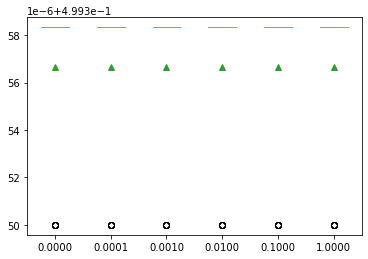

In [20]:
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import std, mean

#get a list of models to evaluate
def get_models():
    models = dict()
    for p in [0.0, 0.0001, 0.001, 0.01, 0.1, 1.0]:
    # create name for model
        key = '%.4f' % p
    # turn off penalty in some cases
        if p == 0.0:
    # no penalty in this case
            models[key] = LogisticRegression(multi_class='multinomial', solver='lbfgs', penalty='none')
        else:
            models[key] = LogisticRegression(multi_class='multinomial', solver='lbfgs', penalty='l2', C=p)
    return models
 
# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
    # define the evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    # evaluate the model
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores
 
# define dataset
labels = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O']
X = pd.DataFrame(data=df.drop('Class',axis=1),columns=labels)
y = pd.DataFrame(data=df['Class'],columns=['Class'])
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    # evaluate the model and collect the scores
    scores = evaluate_model(model, X, y)
    # store the results
    results.append(scores)
    names.append(name)
    # summarize progress along the way
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

#### In this case, we can see that a C value of 1.0 has the best score of about 49.9 percent, which is the same as using no penalty that achieves the same score
#### A box and whisker plot is created for the accuracy scores for each configuration and all plots are shown side by side on a figure on the same scale for direct comparison.